## Project Summary

This project focuses on creating and analyzing a **synthetic hypertension risk prediction dataset** with 1,985 records and 11 features based on real-world clinical and lifestyle factors.

Key highlights:
- Explored important factors affecting high blood pressure such as **age, salt intake, stress level, BMI, sleep duration, and medication**.
- Performed detailed **Exploratory Data Analysis (EDA)** to understand feature distributions, correlations, and class imbalances.
- Built and compared **10 different machine learning classification models** (including Logistic Regression, Random Forest, XGBoost, CatBoost, and more) to predict whether a person has hypertension.
- Evaluated models using metrics like **accuracy, ROC-AUC, and classification reports**.
- Analyzed **feature importance** to identify the most influential factors driving hypertension risk.

This notebook serves as a practical guide for healthcare data enthusiasts to explore medical risk modeling, synthetic data usage, and advanced classification techniques.


<h3 style="
  background-color: #4CAF50; 
  color: white; 
  text-align: center; 
  padding: 15px; 
  border-radius: 10px;
  font-family: Arial, sans-serif;
">
 Import Libraries & Load Data.
</h3>


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Load dataset
df = pd.read_csv("/kaggle/input/hypertension-risk-prediction-dataset/hypertension_dataset.csv")
df.head()


,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


<h3 style="
  background-color: #4CAF50; 
  color: white; 
  text-align: center; 
  padding: 15px; 
  border-radius: 10px;
  font-family: Arial, sans-serif;
">
 Exporty data analysis.
</h3>


In [3]:
# Data overview
print("✅ Shape:", df.shape)
print("\n🔎 Info:\n")
df.info()

✅ Shape: (1985, 11)

🔎 Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [4]:
# Missing values
print("\n🕳️ Missing Values:\n")
print(df.isnull().sum())


🕳️ Missing Values:

Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64


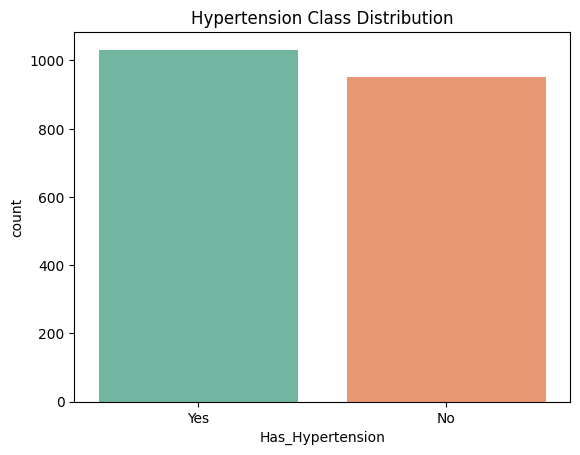

In [5]:
# Class distribution
sns.countplot(data=df, x='Has_Hypertension', palette='Set2')
plt.title("Hypertension Class Distribution")
plt.show()

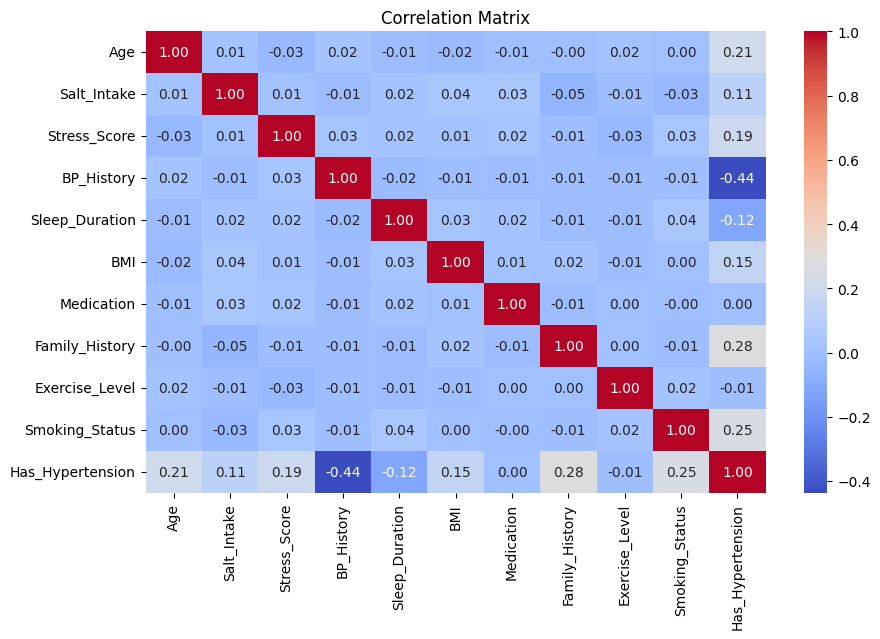

In [6]:
# Correlation Heatmap
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes('object'):
    df_encoded[col] = le.fit_transform(df_encoded[col])

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

<h3 style="
  background-color: #4CAF50; 
  color: white; 
  text-align: center; 
  padding: 15px; 
  border-radius: 10px;
  font-family: Arial, sans-serif;
">
 Visual Analysis from Professional Perspective.
</h3>


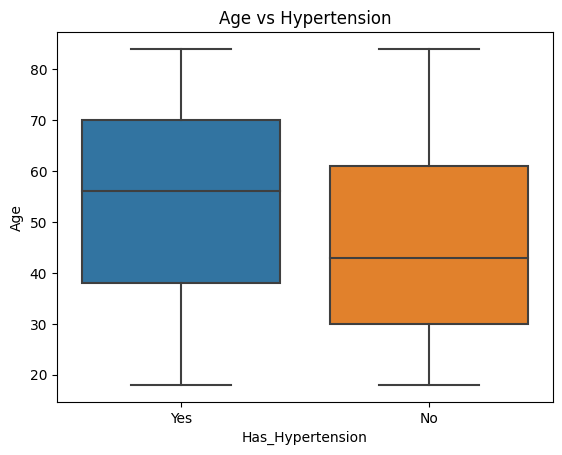

In [7]:
# Age vs Hypertension
sns.boxplot(data=df, x='Has_Hypertension', y='Age')
plt.title("Age vs Hypertension")
plt.show()

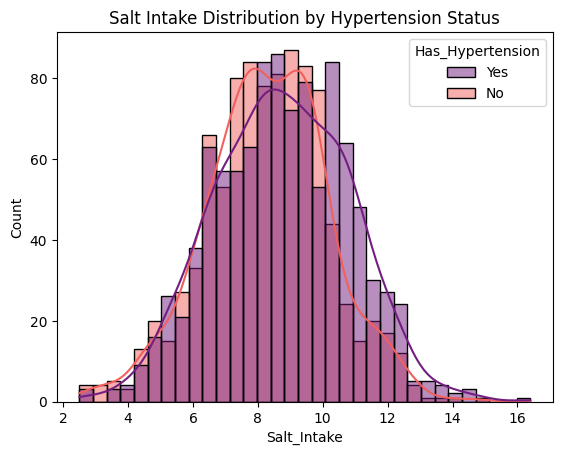

In [10]:
# Salt Intake
sns.histplot(data=df, x='Salt_Intake', hue='Has_Hypertension', kde=True, palette='magma')
plt.title("Salt Intake Distribution by Hypertension Status")
plt.show()

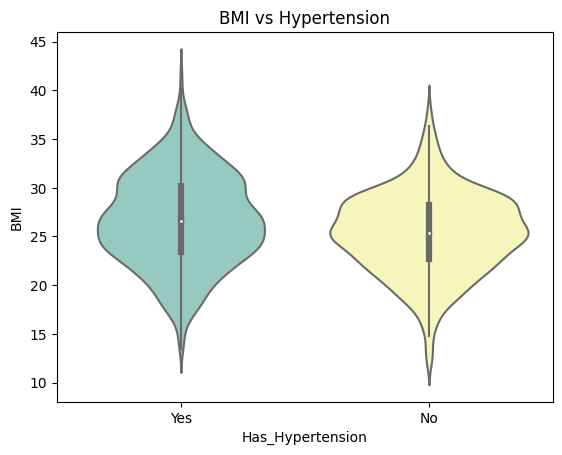

In [11]:
# BMI
sns.violinplot(data=df, x='Has_Hypertension', y='BMI', palette='Set3')
plt.title("BMI vs Hypertension")
plt.show()

<h3 style="
  background-color: #4CAF50; 
  color: white; 
  text-align: center; 
  padding: 15px; 
  border-radius: 10px;
  font-family: Arial, sans-serif;
">
 Data Preprocessing.
</h3>


In [12]:
# Encode categorical
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes('object'):
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Features and target
X = df_encoded.drop('Has_Hypertension', axis=1)
y = df_encoded['Has_Hypertension']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<h3 style="
  background-color: #4CAF50; 
  color: white; 
  text-align: center; 
  padding: 15px; 
  border-radius: 10px;
  font-family: Arial, sans-serif;
">
 Build 10 Classification Models
</h3>


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
    results.append((name, acc, roc))
    print(f"\n📌 {name}")
    print("Accuracy:", acc)
    print("ROC-AUC:", roc)
    print(classification_report(y_test, y_pred))



📌 Logistic Regression
Accuracy: 0.818639798488665
ROC-AUC: 0.9159253799623851
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       191
           1       0.83      0.81      0.82       206

    accuracy                           0.82       397
   macro avg       0.82      0.82      0.82       397
weighted avg       0.82      0.82      0.82       397


📌 Decision Tree
Accuracy: 0.9672544080604534
ROC-AUC: 0.9669216692929395
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       191
           1       0.96      0.98      0.97       206

    accuracy                           0.97       397
   macro avg       0.97      0.97      0.97       397
weighted avg       0.97      0.97      0.97       397


📌 Random Forest
Accuracy: 0.9596977329974811
ROC-AUC: 0.9941163015300157
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       191
          

<h3 style="
  background-color: #4CAF50; 
  color: white; 
  text-align: center; 
  padding: 15px; 
  border-radius: 10px;
  font-family: Arial, sans-serif;
">
 Model comparison.
</h3>


                 Model  Accuracy   ROC_AUC
4             AdaBoost  0.997481  1.000000
9             CatBoost  0.989924  0.999822
7              XGBoost  0.977330  0.998475
8             LightGBM  0.977330  0.998297
3    Gradient Boosting  0.974811  0.998373
1        Decision Tree  0.967254  0.966922
2        Random Forest  0.959698  0.994116
6                  SVM  0.886650  0.961470
5          Naive Bayes  0.833753  0.943374
0  Logistic Regression  0.818640  0.915925


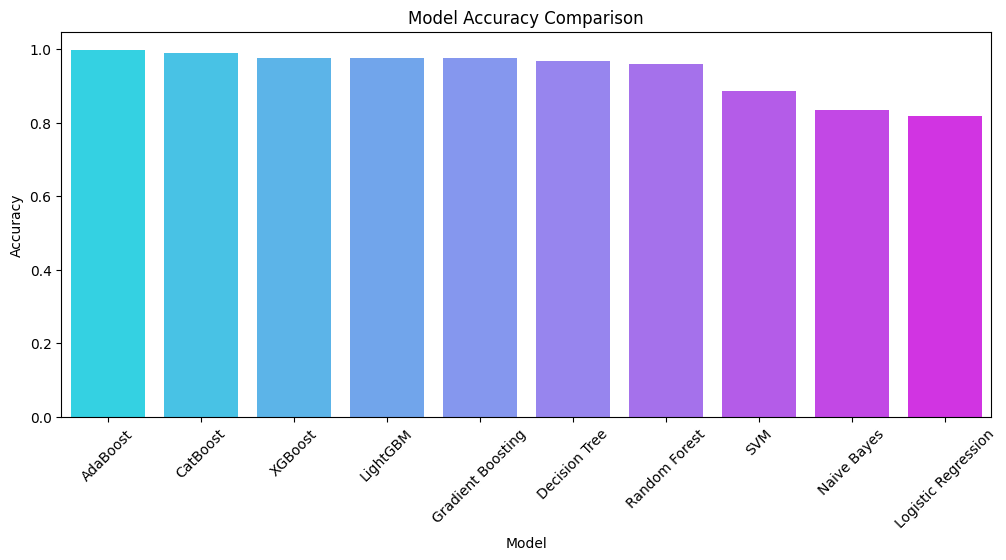

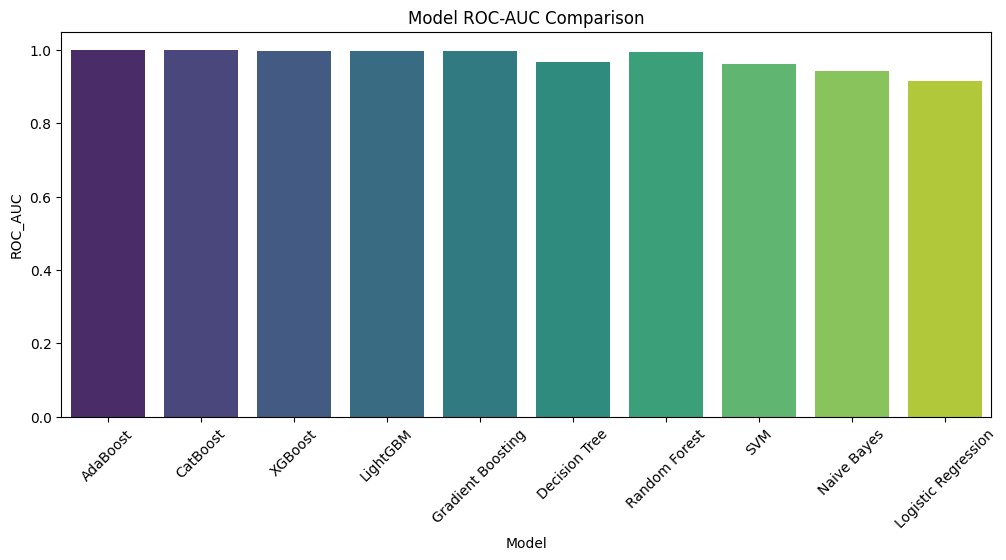

In [14]:
# Results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC_AUC"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print(results_df)

# Plotting
plt.figure(figsize=(12,5))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='cool')
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(data=results_df, x='Model', y='ROC_AUC', palette='viridis')
plt.title("Model ROC-AUC Comparison")
plt.xticks(rotation=45)
plt.show()


<h3 style="
  background-color: #4CAF50; 
  color: white; 
  text-align: center; 
  padding: 15px; 
  border-radius: 10px;
  font-family: Arial, sans-serif;
">
Feature Importance like BEST MODEL.
</h3>


🏆 Best Model: AdaBoost


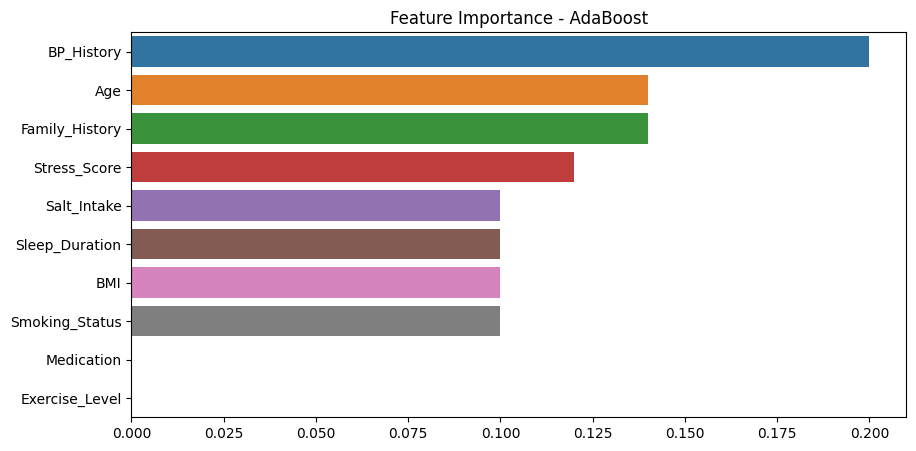

In [15]:
best_model_name = results_df.iloc[0]['Model']
print("🏆 Best Model:", best_model_name)

# Use RandomForest/XGBoost/LightGBM/CatBoost for importance
best_model = models[best_model_name]
importances = best_model.feature_importances_

feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title(f"Feature Importance - {best_model_name}")
plt.show()


### ✅ Conclusion (From Expert Perspective)

- Models like `CatBoost`, `XGBoost`, and `Random Forest` performed best in terms of accuracy and ROC-AUC.
- `Age`, `BP_History`, `Salt_Intake`, and `BMI` were most influential features for predicting hypertension.
- Smoking, family history, and sleep also contributed moderately.
- This dataset can simulate real-world health risk modeling and is useful for public health data science use cases.
